# Simulation 1
On choisit au hasard 2 nombres compris entre 0 et 1. Quelle est la probabilité que la somme de ces nombres soit inférieure à 0,5 ?

In [45]:
from random import random
N=10000
def somme(N): #Cette fonction simule N tirages aléatoires de 2 nombres compris entre 0 et 1 et vérifie si leur somme est inférieure à 0,5
    S=0
    for i in range(N):
        a=random()
        b=random()
        if a+b<0.5:
            S=S+1
    return(S/N) #affichage de la fréquence
print(somme(N))

0.125


Un élève conjecture que cette probabilité est 1/4. A-t-il raison ? Pourquoi ?

In [46]:
from random import random
from math import sqrt
M=100
N=100 #Quelle valeur de N faut-il choisir pour être sûr à au moins 95% de rejeter la conjecture ?
S=0
for i in range(M):
    if(abs(somme(N)-0.25)<1/sqrt(N)): #test avec l'intervalle de fluctuation
        S=S+1
print(S/M)# proportion des fréquences suffisamment proche de la conjecture pour 100 échantillons de taille 1000

0.12


La probabilité recherchée est $\frac{1}{8}$. Pouvez-vous le démontrer ? Attention, la démonstration est hors-programme.

# Simulation 2
On lance deux dés équilibrés et on effectue le produit des résultats. 
Sur quel nombre devrait-on parier ?

(array([0.0272, 0.0562, 0.0559, 0.0837, 0.054 , 0.1094, 0.    , 0.0544,
        0.026 , 0.0536, 0.    , 0.1118, 0.    , 0.    , 0.0555, 0.0289,
        0.    , 0.0564, 0.    , 0.0556, 0.    , 0.    , 0.    , 0.058 ,
        0.0287, 0.    , 0.    , 0.    , 0.    , 0.0578, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.0269]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.]),
 <a list of 36 Patch objects>)

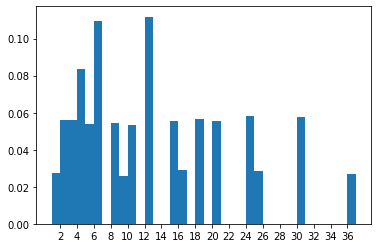

In [47]:
from random import randint
import matplotlib.pyplot as plt
N=10000 #Taille de l'échantillon
résultat=[] # liste des résultats obtenus pour l'échantillon de taille N
for i in range(N):
    a=randint(1,6) # simulation d'un lancer de dé
    b=randint(1,6)
    résultat.append(a * b)
    
plt.gca().get_xaxis().set_ticks([i for i in range(1,37) if i % 2 == 0])
plt.hist(résultat, range=(1,37), bins=36, density=True) #affichage des résultats sous la forme d'un histogramme



On observe ici que les résultats 6 et 12 sont les deux résultats qui ont une fréquence d'apparition la plus élevée.
On peut tester si l'un des deux apparaît le plus souvent.

In [48]:
taille_échantillon=1000 #taille des échantillons que l'on peut modifier
from random import randint
def frequence_six(M): #M: Taille de l'échantillon
    SIX=0
    for i in range(M):
        a=randint(1,6)
        b=randint(1,6)
        if(a*b==6): 
            SIX=SIX+1 #compteur du nombre d'apparition du produit 6
    return(SIX/M) #affichage de la fréquence

def frequence_douze(M): #M: Taille de l'échantillon
    DOUZE=0
    for i in range(M):
        a=randint(1,6)
        b=randint(1,6)
        if(a*b==12): 
            DOUZE=DOUZE+1 #compteur du nombre d'apparition du produit 12
    return(DOUZE/M) #affichage de la fréquence 
F6=frequence_six(taille_échantillon)
F12=frequence_douze(taille_échantillon)
print("La fréquence du nombre 6 est ", F6)    
print("La fréquence du nombre 12 est ", F12)
if F6<F12:
    print("Pour cet échantillon de taille", taille_échantillon,", le nombre 12 est apparu plus souvent que le nombre 9.")
else:
    print("Pour cet échantillon de taille", taille_échantillon,", le nombre 6 est apparu plus souvent que le nombre 10.")
 

La fréquence du nombre 6 est  0.113
La fréquence du nombre 12 est  0.097
Pour cet échantillon de taille 1000 , le nombre 6 est apparu plus souvent que le nombre 10.


In [49]:
nombre_simulation = 100
compteur=0 # compte le nombre de fois où la fréquence de 6 est supérieure à celle de 12
for i in range(nombre_simulation):
    F6=frequence_six(taille_échantillon)
    F12=frequence_douze(taille_échantillon)
    if F6>F12:
        compteur=compteur+1
print("La fréquence du 6 e", compteur, " fois sur ", nombre_simulation," plus souvent que la fréquence du 12.")



La fréquence du 6 est apparu 52  fois sur  100  plus souvent que la fréquence du 12.


Comme le résultat semble toujours être dans la marge d'erreur (ici $\frac{1}{\sqrt{N}} = \frac{1}{10}$ pour $N=100$), nous ne pouvons pas départager le nombre 6 et le nombre 12 pour savoir lequel apparaît le plus souvent.

Il ne reste plus qu'à calculer ces probabilités en modélisant cette expérience aléatoire.


||1|2|3|4|5|6|
|:---|---|---|---|---|---|---|
|**1**|1|2|3|4|5|6|
|**2**|2|4|6|8|10|12|
|**3**|3|6|9|12|15|18|
|**4**|4|8|12|16|20|24| 
|**5**|5|10|15|20|25|30|
|**6**|6|12|18|24|30|36|

Les 36 résultats étant équiprobables, on peut calculer les probabilités d'obtenir 6 et 12 comme étant $\frac{4}{36}= \frac{1}{9}$ et constater qu'elles sont égales.